In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from nemo.data.dataloader import TrialAvgNeuralDataset
from nemo.model.utils import to_tensor

In [2]:
batch_size = 128
gpu = 1
n_workers = 8
train_stim = ['natural_movie_three', 'natural_movie_two']
val_stim = ['natural_movie_one']

In [3]:
pv_dset = TrialAvgNeuralDataset(
    data_dir = '../../data/AIBO/VISp/L4/Inhib/ExtractedData',
    stimuli = train_stim + val_stim,
    cre_lines = ['Pvalb-IRES-Cre'],
    stim_height = 80,
    stim_width = 128,
    n_frames = 1
)

INFO -- 03/25/2021 09:52:34 PM -- Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO -- 03/25/2021 09:52:34 PM -- NumExpr defaulting to 8 threads.
INFO -- 03/25/2021 09:52:35 PM -- DATASET INITIALIZED
INFO -- 03/25/2021 09:52:35 PM --    - NEURAL DATA DIR: ../../data/AIBO/VISp/L4/Inhib/ExtractedData/NeuralData
INFO -- 03/25/2021 09:52:35 PM --    - STIMULI DATA DIR: ../../data/AIBO/VISp/L4/Inhib/ExtractedData/Stimuli
INFO -- 03/25/2021 09:52:35 PM --    - STIMULI: ['natural_movie_three', 'natural_movie_two', 'natural_movie_one']
INFO -- 03/25/2021 09:52:35 PM --    - CRE LINES: ['Pvalb-IRES-Cre']
INFO -- 03/25/2021 09:52:35 PM --    - NUM. CELLS: 93
INFO -- 03/25/2021 09:52:35 PM --    - NUM. ANIMALS: 10
INFO -- 03/25/2021 09:52:35 PM --    - NUM. STIMULUS FRAMES: 5400


In [4]:
pv_dset.data

,stimulus,frame,686731234_669876048,686731315_669876048,686731374_669876048,686731781_669876048,686731792_669876048,686731806_669876048,686731815_669876048,686731822_669876048,...,721485269_710504561,721485304_710504561,728680184_710327593,728680195_710327593,728680216_710327593,728680226_710327593,728680250_710327593,728680271_710327593,728680353_710327593,728680480_710327593
0,natural_movie_one,0.0,0.015808,-0.020905,0.030258,-0.078430,0.015762,-0.011734,0.016357,0.009552,...,0.041626,-0.033142,0.017761,-0.012444,0.040527,0.037964,0.004448,0.046173,0.038025,0.012222
1,natural_movie_one,1.0,0.008041,-0.015976,0.039825,-0.083435,-0.008820,-0.026993,0.019073,-0.013054,...,0.042694,-0.006176,-0.008820,-0.031586,0.016861,0.035553,0.000425,0.041901,0.033539,-0.011223
2,natural_movie_one,2.0,0.013168,-0.013466,0.024323,-0.076599,-0.004177,-0.020401,0.018845,0.001064,...,0.022934,-0.022659,-0.018509,-0.023254,0.025940,0.026199,0.008919,0.042725,0.035217,-0.005081
3,natural_movie_one,3.0,0.006233,-0.017807,0.024048,-0.087952,0.030289,-0.021576,0.028534,0.012100,...,0.036377,-0.040649,-0.033295,-0.019958,0.020920,0.042908,0.006660,0.038788,0.036591,0.014091
4,natural_movie_one,4.0,0.005711,-0.030548,0.061249,-0.088867,0.029633,-0.025833,0.038300,0.043243,...,0.045074,-0.017349,-0.001364,-0.019287,0.037506,0.043549,0.009651,0.042816,0.058777,-0.014183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,natural_movie_two,895.0,0.018982,0.022552,-0.012825,0.139526,-0.029282,0.047211,-0.024719,-0.030685,...,-0.023499,0.038361,-0.030426,0.078674,0.018127,0.059509,0.086609,0.032104,-0.026642,-0.021118
5396,natural_movie_two,896.0,-0.001103,-0.037842,-0.015945,0.174316,-0.003906,0.042419,-0.041779,-0.001972,...,-0.009895,-0.030640,0.024750,0.049683,0.036987,0.028671,0.086304,0.021591,-0.064148,-0.009285
5397,natural_movie_two,897.0,0.010971,0.016296,-0.039276,0.168335,0.015991,0.029160,-0.026306,0.052795,...,-0.014236,-0.011063,-0.035583,-0.007446,-0.007771,0.057495,0.087891,0.029434,-0.040161,0.009331
5398,natural_movie_two,898.0,0.028503,0.013161,-0.009155,0.190308,0.017288,0.044800,-0.015030,-0.074768,...,-0.011757,-0.027557,-0.025970,0.029785,0.011826,0.015823,0.094299,0.038605,-0.034546,0.005684


Text(96.0, 0.5, 'Neuron')

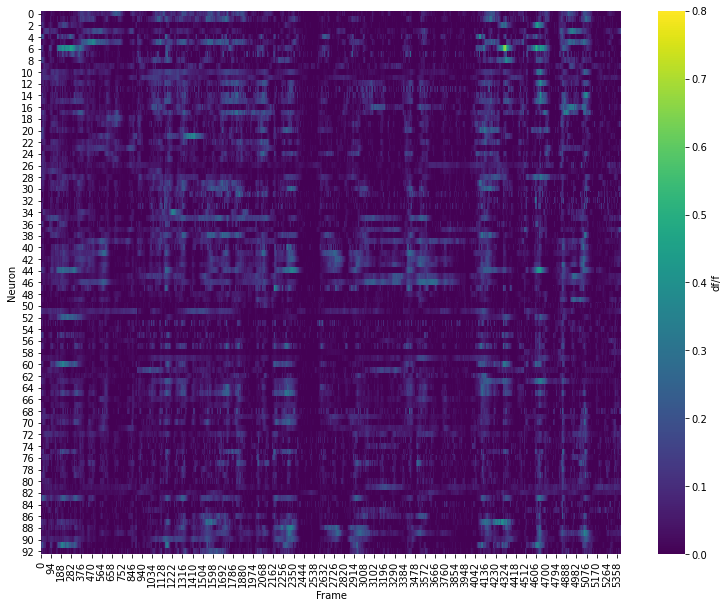

In [5]:
fig = plt.figure(figsize = (13, 10))
seaborn.heatmap(
    data = pv_dset.data.set_index(['stimulus', 'frame']).to_numpy().transpose(),
    cmap = 'viridis',
    vmin = 0.0,
    vmax = 0.8,
    cbar_kws = {'label': 'df/f'}
)
plt.xlabel('Frame')
plt.ylabel('Neuron')

In [6]:
pv_train_dl = DataLoader(
    pv_dset,
    batch_size = batch_size, 
    num_workers = n_workers,
    sampler = RandomSampler(pv_dset.data.index[pv_dset.data.stimulus.isin(train_stim)])
)
pv_val_dl = DataLoader(
    pv_dset,
    batch_size = batch_size,
    num_workers = n_workers,
    sampler = SequentialSampler(pv_dset.data.index[pv_dset.data.stimulus.isin(val_stim)])
)

In [ ]:
for batch_num, (frame, dff) in enumerate(pv_train_dl):
    print(batch_num)